# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#Обучение-без-учителя,-понижение-размерности,-кластеризация" data-toc-modified-id="Обучение-без-учителя,-понижение-размерности,-кластеризация-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обучение без учителя, понижение размерности, кластеризация</a></div><div class="lev3 toc-item"><a href="#Иерархическая-кластеризация:-Пищевая-ценность-продуктов" data-toc-modified-id="Иерархическая-кластеризация:-Пищевая-ценность-продуктов-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Иерархическая кластеризация: Пищевая ценность продуктов</a></div><div class="lev2 toc-item"><a href="#DBSCAN:-Геоданные" data-toc-modified-id="DBSCAN:-Геоданные-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DBSCAN: Геоданные</a></div><div class="lev3 toc-item"><a href="#Отток-в-игре:-PCA-+-RFE" data-toc-modified-id="Отток-в-игре:-PCA-+-RFE-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Отток в игре: PCA + RFE</a></div><div class="lev3 toc-item"><a href="#Сжатие-признаков-для-визуализации" data-toc-modified-id="Сжатие-признаков-для-визуализации-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Сжатие признаков для визуализации</a></div><div class="lev3 toc-item"><a href="#RFE-+-Decision-tree" data-toc-modified-id="RFE-+-Decision-tree-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>RFE + Decision tree</a></div>

# Skillfactory - Практический Machine Learning
## Обучение без учителя, понижение размерности, кластеризация

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, fixed, FloatSlider

### Иерархическая кластеризация: Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

In [3]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


* Подготовте данные к кластеризации 
    * Выделите признаки в матрицу X (numpy array)
    * Отнормируйте признаки

In [4]:
X = np.array(df[df.columns[1:]].head())
X

array([[340. ,  20. ,  28. ,   9. ,   2.6],
       [245. ,  21. ,  17. ,   9. ,   2.7],
       [420. ,  15. ,  39. ,   7. ,   2. ],
       [375. ,  19. ,  32. ,   9. ,   2.6],
       [180. ,  22. ,  10. ,  17. ,   3.7]])

### Вариант №1

In [5]:
from numpy import linalg as LA

norms = np.linalg.norm(X, axis = 0, keepdims = True)
X /= norms
X

array([[0.46922224, 0.45750901, 0.45920154, 0.37338292, 0.41902794],
       [0.33811602, 0.48038446, 0.27880094, 0.37338292, 0.4351444 ],
       [0.57962747, 0.34313176, 0.63960215, 0.29040893, 0.32232919],
       [0.51752453, 0.43463356, 0.52480176, 0.37338292, 0.41902794],
       [0.24841177, 0.50325991, 0.16400055, 0.70527884, 0.59630899]])

### Вариант №2

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [7]:
X_norm=StandardScaler(X)

### Вариант №3

In [8]:
def normer(df):    
    df_preproc = df.copy()
    df_preproc['Energy_norm'] = (df_preproc['Energy'] - df_preproc['Energy'].mean()) / df_preproc['Energy'].std()
    df_preproc['Protein_norm'] = (df_preproc['Protein'] - df_preproc['Protein'].mean()) / df_preproc['Protein'].std()
    df_preproc['Fat_norm'] = (df_preproc['Fat'] - df_preproc['Fat'].mean()) / df_preproc['Fat'].std()
    df_preproc['Calcium_norm'] = (df_preproc['Calcium'] - df_preproc['Calcium'].mean()) / df_preproc['Calcium'].std()
    df_preproc['Iron_norm'] = (df_preproc['Iron'] - df_preproc['Iron'].mean()) / df_preproc['Iron'].std()
    df_preproc.drop(['Energy','Protein','Fat','Calcium','Iron'],axis = 1, inplace = True)
    return df_preproc  

#### С точки зрения результата 2 и 3 эквивалентны
В 1  только масштабируется значения но не делается смещение. То есть среднее значение признаков не будет в 0. C этим в данном случае можно жить, но обычно признаки еще и центрируют

In [9]:
df_norm = df.pipe(normer)
df_norm

,Name,Energy_norm,Protein_norm,Fat_norm,Calcium_norm,Iron_norm
0,Braised beef,1.310102,0.235200,1.289729,-0.448046,0.149537
1,Hamburger,0.371440,0.470400,0.312562,-0.448046,0.217968
2,Roast beef,2.100555,-0.940801,2.266896,-0.473676,-0.261055
3,Beefsteak,1.655926,0.000000,1.645062,-0.448046,0.149537
4,Canned beef,-0.270803,0.705601,-0.309272,-0.345527,0.902288
5,Broiled chicken,-0.913046,0.235200,-0.931105,-0.460861,-0.671647
6,Canned chicken,-0.369610,1.411201,-0.575772,-0.409602,-0.603215
7,Beef heart,-0.468417,1.646402,-0.753438,-0.383972,2.407792
8,Roast lamb leg,0.569053,0.235200,0.579062,-0.448046,0.149537
9,Roast lamb shoulder,0.914876,-0.235200,1.023229,-0.448046,-0.055759


In [10]:
X_ = np.array(df_norm[df_norm.columns[1:]])
X  = np.array(df_norm)

* Произведите иерархическую кластеризацию этого набора данных (метод `linkage`)
* Выберите тип пересчета расстояния между кластерами с помощью кофенетической корреляции

In [11]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet

In [12]:
"""
# На всякий случай оставлю пока.
ag=AgglomerativeClustering(connectivity="callable", linkage="complete", affinity="cosine")#, "average")
clusters=ag.fit_predict(X)
ax=pd.DataFrame(X).plot.scatter(x=0, y=1, c=clusters, cmap=plt.cm.Set1)
"""

'\n# На всякий случай оставлю пока.\nag=AgglomerativeClustering(connectivity="callable", linkage="complete", affinity="cosine")#, "average")\nclusters=ag.fit_predict(X)\nax=pd.DataFrame(X).plot.scatter(x=0, y=1, c=clusters, cmap=plt.cm.Set1)\n'

In [13]:
from scipy.spatial.distance import pdist

"\n method   = coph_corr\n metric   = euclidean  'cityblock'\n \n'median'  = 0,807       0.733\n'ward'    = 0.612\n'single'  = 0.77\n'complete'= 0.71\n'average' = 0.864       0.793\n'weighted'= 0.738\n'centroid'= 0.861       0.792\n = \n"

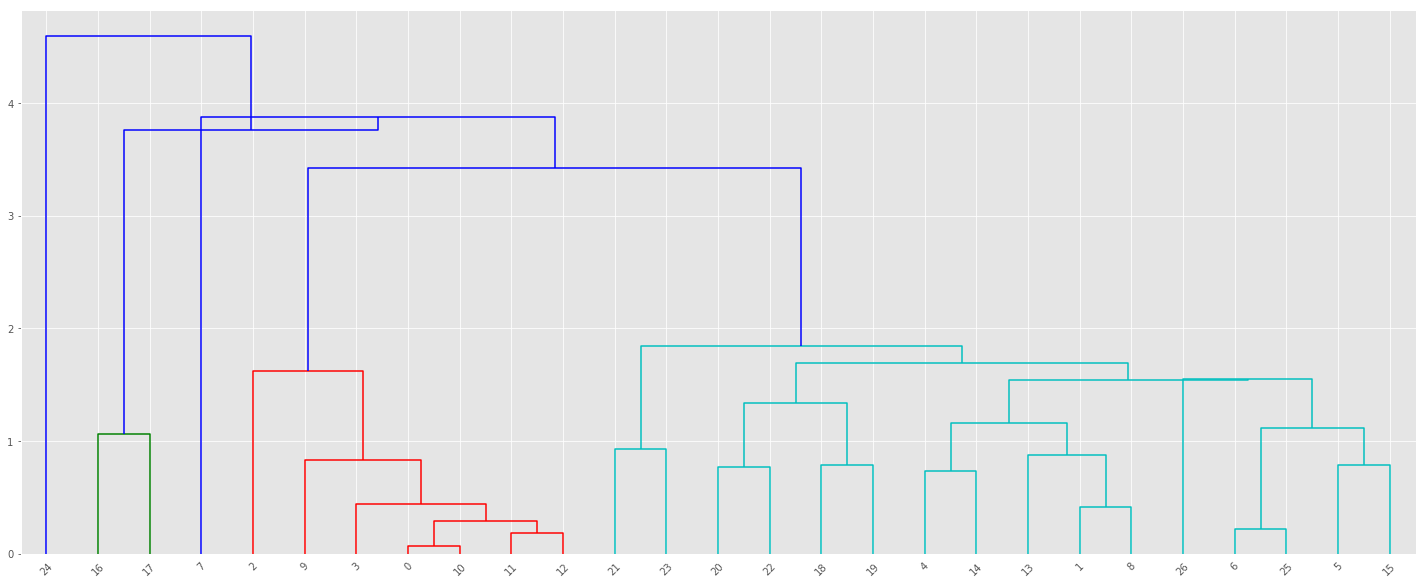

In [14]:
Z = linkage(X_, 'median'  )
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
"""
 method   = coph_corr
 metric   = euclidean  'cityblock'
 
'median'  = 0,807       0.733
'ward'    = 0.612
'single'  = 0.77
'complete'= 0.71
'average' = 0.864       0.793
'weighted'= 0.738
'centroid'= 0.861       0.792
 = 
"""

In [15]:
d = pdist(X_, metric='cityblock')
coph_corr, coph_dist = cophenet(Z, d)
print(coph_corr)
print(coph_dist)


0.7339415719387148
[3.42624188 1.61812637 0.44407722 3.42624188 3.42624188 3.42624188
 3.87808075 3.42624188 0.82937681 0.06843197 0.28852937 0.28852937
 3.42624188 3.42624188 3.42624188 3.76330834 3.76330834 3.42624188
 3.42624188 3.42624188 3.42624188 3.42624188 3.42624188 4.59709448
 3.42624188 3.42624188 3.42624188 3.42624188 1.16239555 1.54505335
 1.54505335 3.87808075 0.41240192 3.42624188 3.42624188 3.42624188
 3.42624188 0.87224248 1.16239555 1.54505335 3.76330834 3.76330834
 1.69655963 1.69655963 1.69655963 1.84091967 1.69655963 1.84091967
 4.59709448 1.54505335 1.54505335 1.61812637 3.42624188 3.42624188
 3.42624188 3.87808075 3.42624188 1.61812637 1.61812637 1.61812637
 1.61812637 3.42624188 3.42624188 3.42624188 3.76330834 3.76330834
 3.42624188 3.42624188 3.42624188 3.42624188 3.42624188 3.42624188
 4.59709448 3.42624188 3.42624188 3.42624188 3.42624188 3.42624188
 3.87808075 3.42624188 0.82937681 0.44407722 0.44407722 0.44407722
 3.42624188 3.42624188 3.42624188 3.7633083

* Изобразите дендрограмму
    * Сначала просто посмотрите на результат метода `dendrogram`
    * Сделаем визуализацию более наглядной:
        * Выделите названия продуктов в numpy array c названием `names`
        * Выполните `dendrogram`  аргументами `orientation='left'`, `labels=names`
        * Теперь мы должны увидеть, что дендрограмма транспонировалась и вместо безымянных индексов мы имеем наименования объектов

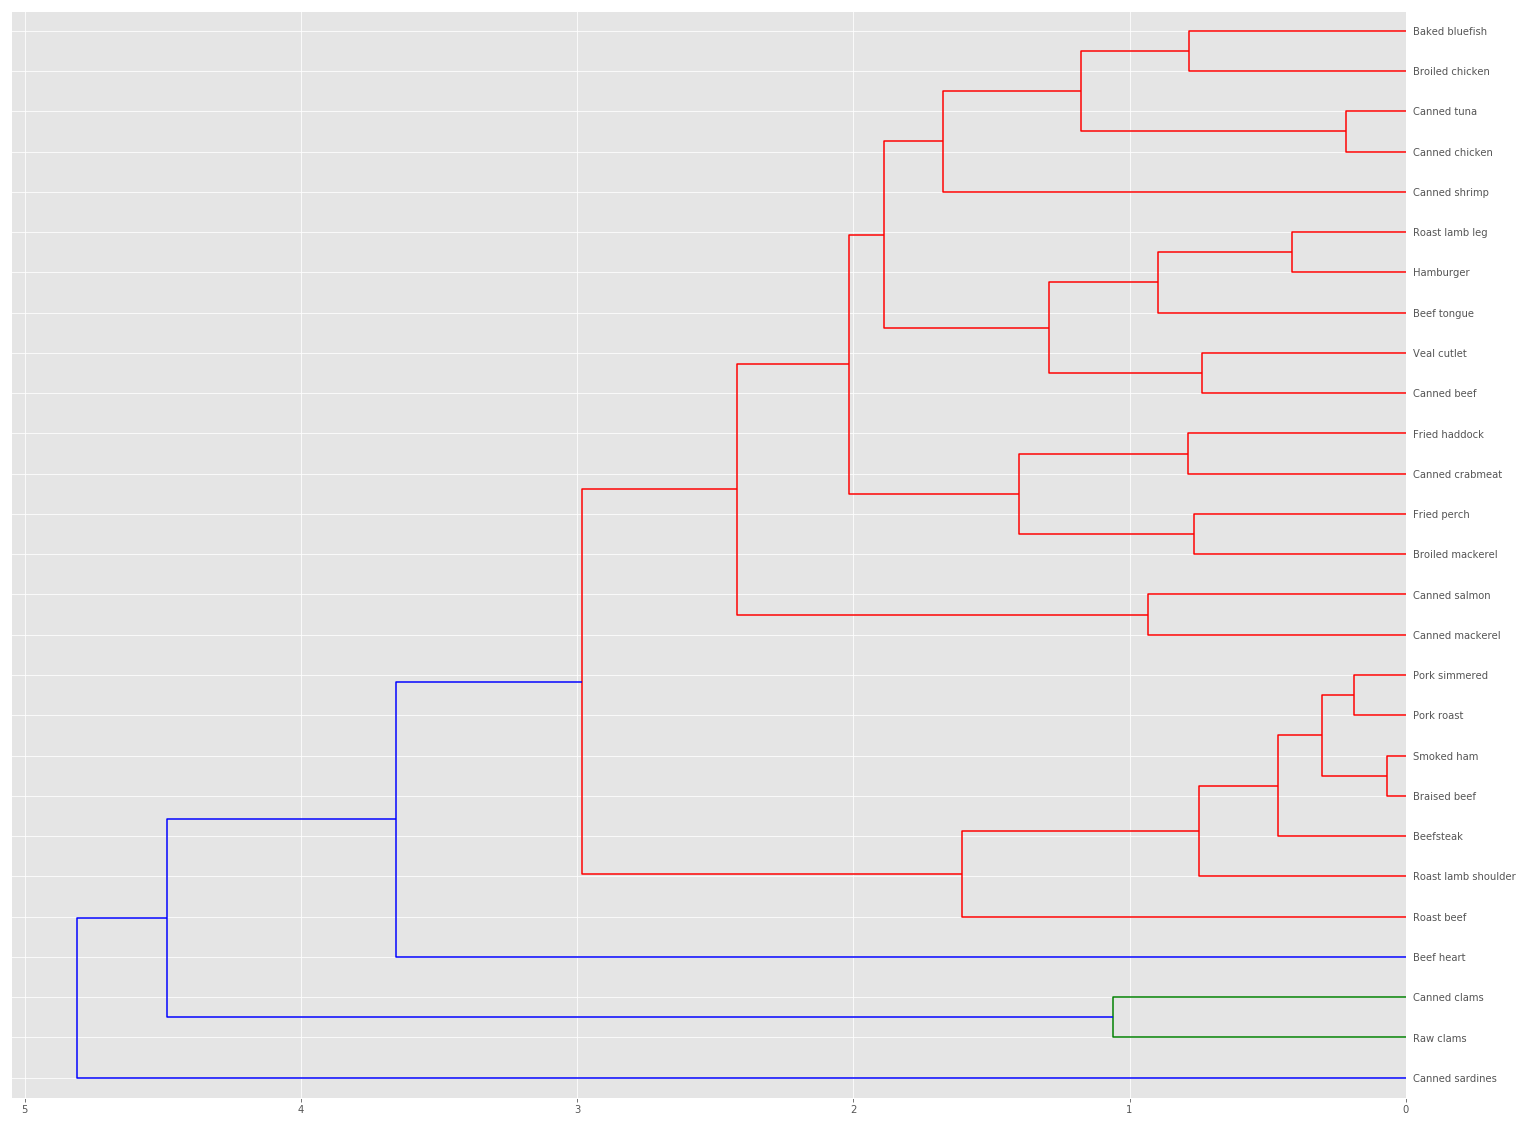

In [16]:
names = np.array(df_norm.iloc[:,0])
Z = linkage(X_, 'average')
fig = plt.figure(figsize=(25, 20))
dn = dendrogram(Z,orientation='left',labels=names) #

* Выделите кластеры по дендрограмме с помощью метода `fcluster`
    * Наличие кластеров, состоящих из одного объекта - нормальное явление, если это можно объяснить

In [17]:
labels = fcluster(Z,  4, criterion='maxclust')
df['cluster'] = pd.DataFrame(labels)
df

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
0,Braised beef,340,20,28,9,2.6,2
1,Hamburger,245,21,17,9,2.7,2
2,Roast beef,420,15,39,7,2.0,2
3,Beefsteak,375,19,32,9,2.6,2
4,Canned beef,180,22,10,17,3.7,2
5,Broiled chicken,115,20,3,8,1.4,2
6,Canned chicken,170,25,7,12,1.5,2
7,Beef heart,160,26,5,14,5.9,3
8,Roast lamb leg,265,20,20,9,2.6,2
9,Roast lamb shoulder,300,18,25,9,2.3,2


в 4-м кластере только один объект - консервированные сардины, т.к. в них очень большое количество кальция. 

## DBSCAN: Геоданные

In [18]:
# Опционально, установите установите matplotlib.basemap
# Либо закоментируйте команду ниже
import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [19]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [20]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [21]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

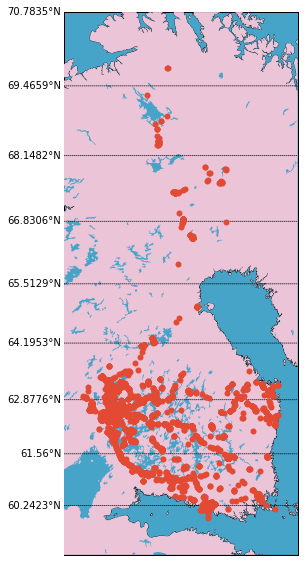

In [22]:
plot_geo(df_geo.loc[:, 'lat'].values, df_geo.loc[:, 'lon'].values)

Это данные с check-in людей в foursquare. В данных могут быть ошибки и просто непопулярные заведения.

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [23]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)
X

array([[1.09254644, 0.51912899],
       [1.09283093, 0.51913073],
       [1.09282744, 0.51915866],
       ...,
       [1.09266338, 0.5190679 ],
       [1.09256739, 0.5191063 ],
       [1.0925447 , 0.51911502]])

In [24]:
X.shape

(13467, 2)

In [25]:
df = pd.DataFrame(X)

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше  например для себя мы определили, что кластером будет считаться группа из **минимум** 20 точек - MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер при всевозможных `eps`
* Выберите eps, при котором график начинает "уходить вверх" (примерно 0.02-0.06, если все было сделано верно)

##### kneighbors(X=None, n_neighbors=None, return_distance=True)
Finds the K-neighbors of a point. Returns indices of and distances to the neighbors of each point.

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
nn = NearestNeighbors()
nn.fit(X)
r = nn.kneighbors(X, 20, return_distance = True)
r[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.74532925e-06, 1.74532925e-06, 1.74532925e-06],
       [0.00000000e+00, 2.46826830e-06, 3.49065850e-06, ...,
        8.72664626e-06, 8.72664626e-06, 8.72664626e-06],
       [0.00000000e+00, 3.90267485e-06, 7.19617686e-06, ...,
        1.92777917e-05, 1.95133743e-05, 1.95133743e-05],
       ...,
       [0.00000000e+00, 2.46826830e-06, 2.46826830e-06, ...,
        9.39888566e-06, 9.39888566e-06, 9.87307320e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.29287411e-06, 7.19617686e-06, 7.19617686e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46826830e-06, 2.46826830e-06, 2.46826830e-06]])

In [28]:
indexes_df = pd.DataFrame(r[1]) # массив индексов. для каждого индекса приведены по 19 находящихся рядом 
indexes_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11953,12790,13270,641,0,11603,13068,12492,4136,11196,8902,2319,12881,4695,10765,2386,12367,1929,13005,12696
1,1,1158,1157,627,1152,1190,1291,13417,61,13368,1092,1174,105,5603,132,996,857,511,851,824
2,2,1147,1534,1192,943,1548,1257,510,4247,1056,12532,101,947,946,127,1191,823,1189,12536,913
3,3,6534,8911,1797,2092,13188,2104,5805,7317,10889,8910,13187,11049,6291,13072,2097,4703,171,5321,277
4,4,11,13102,1383,1431,1288,7318,1813,1401,12787,6530,9078,1863,12805,1414,18,16,1408,14,4894


In [29]:
distances_df = pd.DataFrame(r[0]) # массив расстояний. 
distances_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
1,0.0,0.000002,0.000003,0.000004,0.000004,0.000005,0.000005,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000007,0.000008,0.000009,0.000009,0.000009,0.000009
2,0.0,0.000004,0.000007,0.000007,0.000009,0.000012,0.000013,0.000013,0.000014,0.000015,0.000015,0.000016,0.000017,0.000017,0.000018,0.000019,0.000019,0.000019,0.000020,0.000020
3,0.0,0.000000,0.000002,0.000009,0.000009,0.000012,0.000012,0.000013,0.000013,0.000013,0.000013,0.000014,0.000014,0.000014,0.000014,0.000015,0.000015,0.000016,0.000016,0.000016
4,0.0,0.000002,0.000002,0.000003,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007


In [30]:
# Выполним проверку. посмотрим на координаты. Отличие только если в 6-м знаке после запятой. Похоже на правду.
df.iloc[[11953,12790,13270,1929,13005,12696],[0,1]]

,0,1
11953,1.092546,0.519129
12790,1.092546,0.519129
13270,1.092546,0.519129
1929,1.092545,0.519129
13005,1.092545,0.519129
12696,1.092545,0.519129


In [31]:
# создадим список отнормированных значений по каждому кластеру из 20-ти knn
neighbours=[]
for i in range(len(r[0])):
    neighbours.append(np.linalg.norm(r[0][i]))

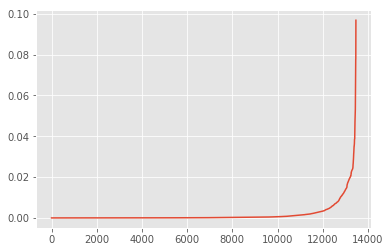

In [32]:
# отсортируемсписок
neighbours=sorted(neighbours)
# и посмотрим на него
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()

а еще такой график можно получить и по последним (20-м) значениям в каждой группе из 20-ти соседей. в этих групппах они отсортированы по удалению, поэтому получим список самых удаленных соседей для каждого элемента. если кто-то зачекинился посреди Невы, он будет первым в упорядоченном списке по удалению. тот кто зачекинился в антарктиде - последним. соответственно волевым усилием примем решением прибавлять ли к кластерам зачекиненых посреди невы, или оставить вне кластеров только полярникв.

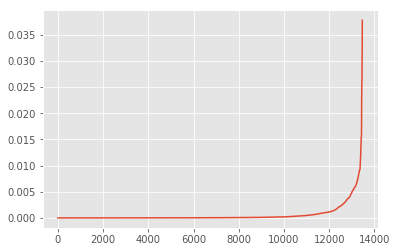

In [33]:
# посмотрим на него
fig, ax = plt.subplots()
ax.plot(range(len(distances_df.iloc[:,-1])), distances_df.iloc[:,-1].sort_values())
plt.show()
# побольше значения, конечно получились, но в целом - да оно же.

#### eps примем равной 0,02

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Интерпретировать кластеры может оказаться затруднительно, но можно избавить от выборов и посмотреть на результат
    * Изобразите координаты точек, не попавших в кластер выбросов (метка -1) 

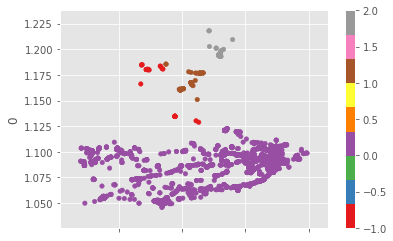

In [34]:
db=DBSCAN(eps=0.02, min_samples=20)
db_clusters=db.fit_predict(X)
ax=pd.DataFrame(X).plot.scatter(x=1, y=0, c=db_clusters, cmap=plt.cm.Set1)

или так:

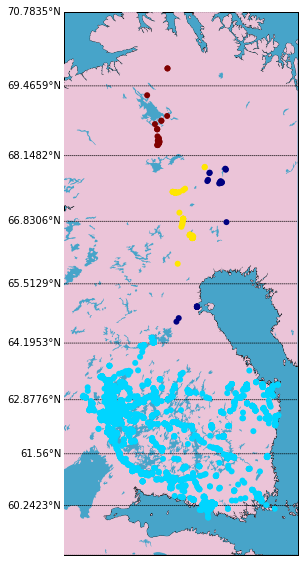

In [35]:
df_geo_copy = df_geo.copy()
df_geo_copy['labels'] = pd.DataFrame(db_clusters)
plot_geo(df_geo_copy.loc[:, 'lat'].values, df_geo_copy.loc[:, 'lon'].values, df_geo_copy.loc[:, 'labels'].values)

In [36]:
# Получим массив меток класса
lables = pd.DataFrame(db.labels_)
lables.describe()

,0
count,13467.000000
mean,0.006609
std,0.121385
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [37]:
# сделаем копию исходного датафрейма и добавим к нему столбец с метками
df_geo_ext = df_geo.copy()
df_geo_ext['labels'] = pd.DataFrame(db.labels_)

Изобразим координаты точек, не попавших в кластер выбросов (метка -1)

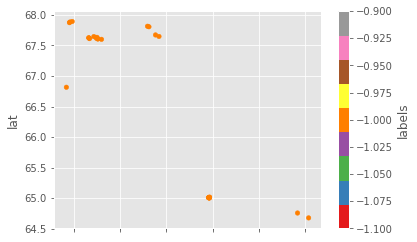

In [38]:
df_geo_ext[df_geo_ext['labels']==-1].plot.scatter(x=1, y=0, c='labels',cmap=plt.cm.Set1)

или так:

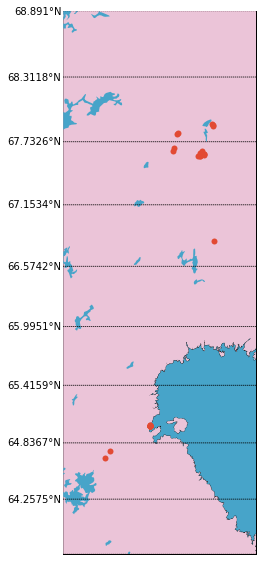

In [39]:
df_geo_ext_labels_min1 = df_geo_ext[df_geo_ext['labels']==-1]
plot_geo(df_geo_ext_labels_min1.loc[:, 'lat'].values, df_geo_ext_labels_min1.loc[:, 'lon'].values)

### Отток в игре: PCA + RFE

В этих данных предлагается построить модель оттока игрока из игрового проекта

Целевой мерой является `log_loss` - чем меньше значение, тем лучше. Для того, чтобы считать `log_loss`, например в `cross_val_score`, необходимо выставить `scoring=neg_log_loss`. Тогда на выходе вы получите **отрицательный** log_loss, который, соответственно, надо максимизировать

In [40]:
import seaborn as sns

In [41]:
df_X = pd.read_csv('data/x_train.csv', sep=';')
df_y = pd.read_csv('data/y_train.csv', names=['target'])

In [42]:
df = df_X.join(df_y)

In [43]:
df.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4,1
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1,0


In [44]:
"""sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')[source]"""

"sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')[source]"

Для начала визуализируйте графики со всеми парами исходных признаков с помощью `sns.pairplot` с раскраской по целевой переменной `target`.

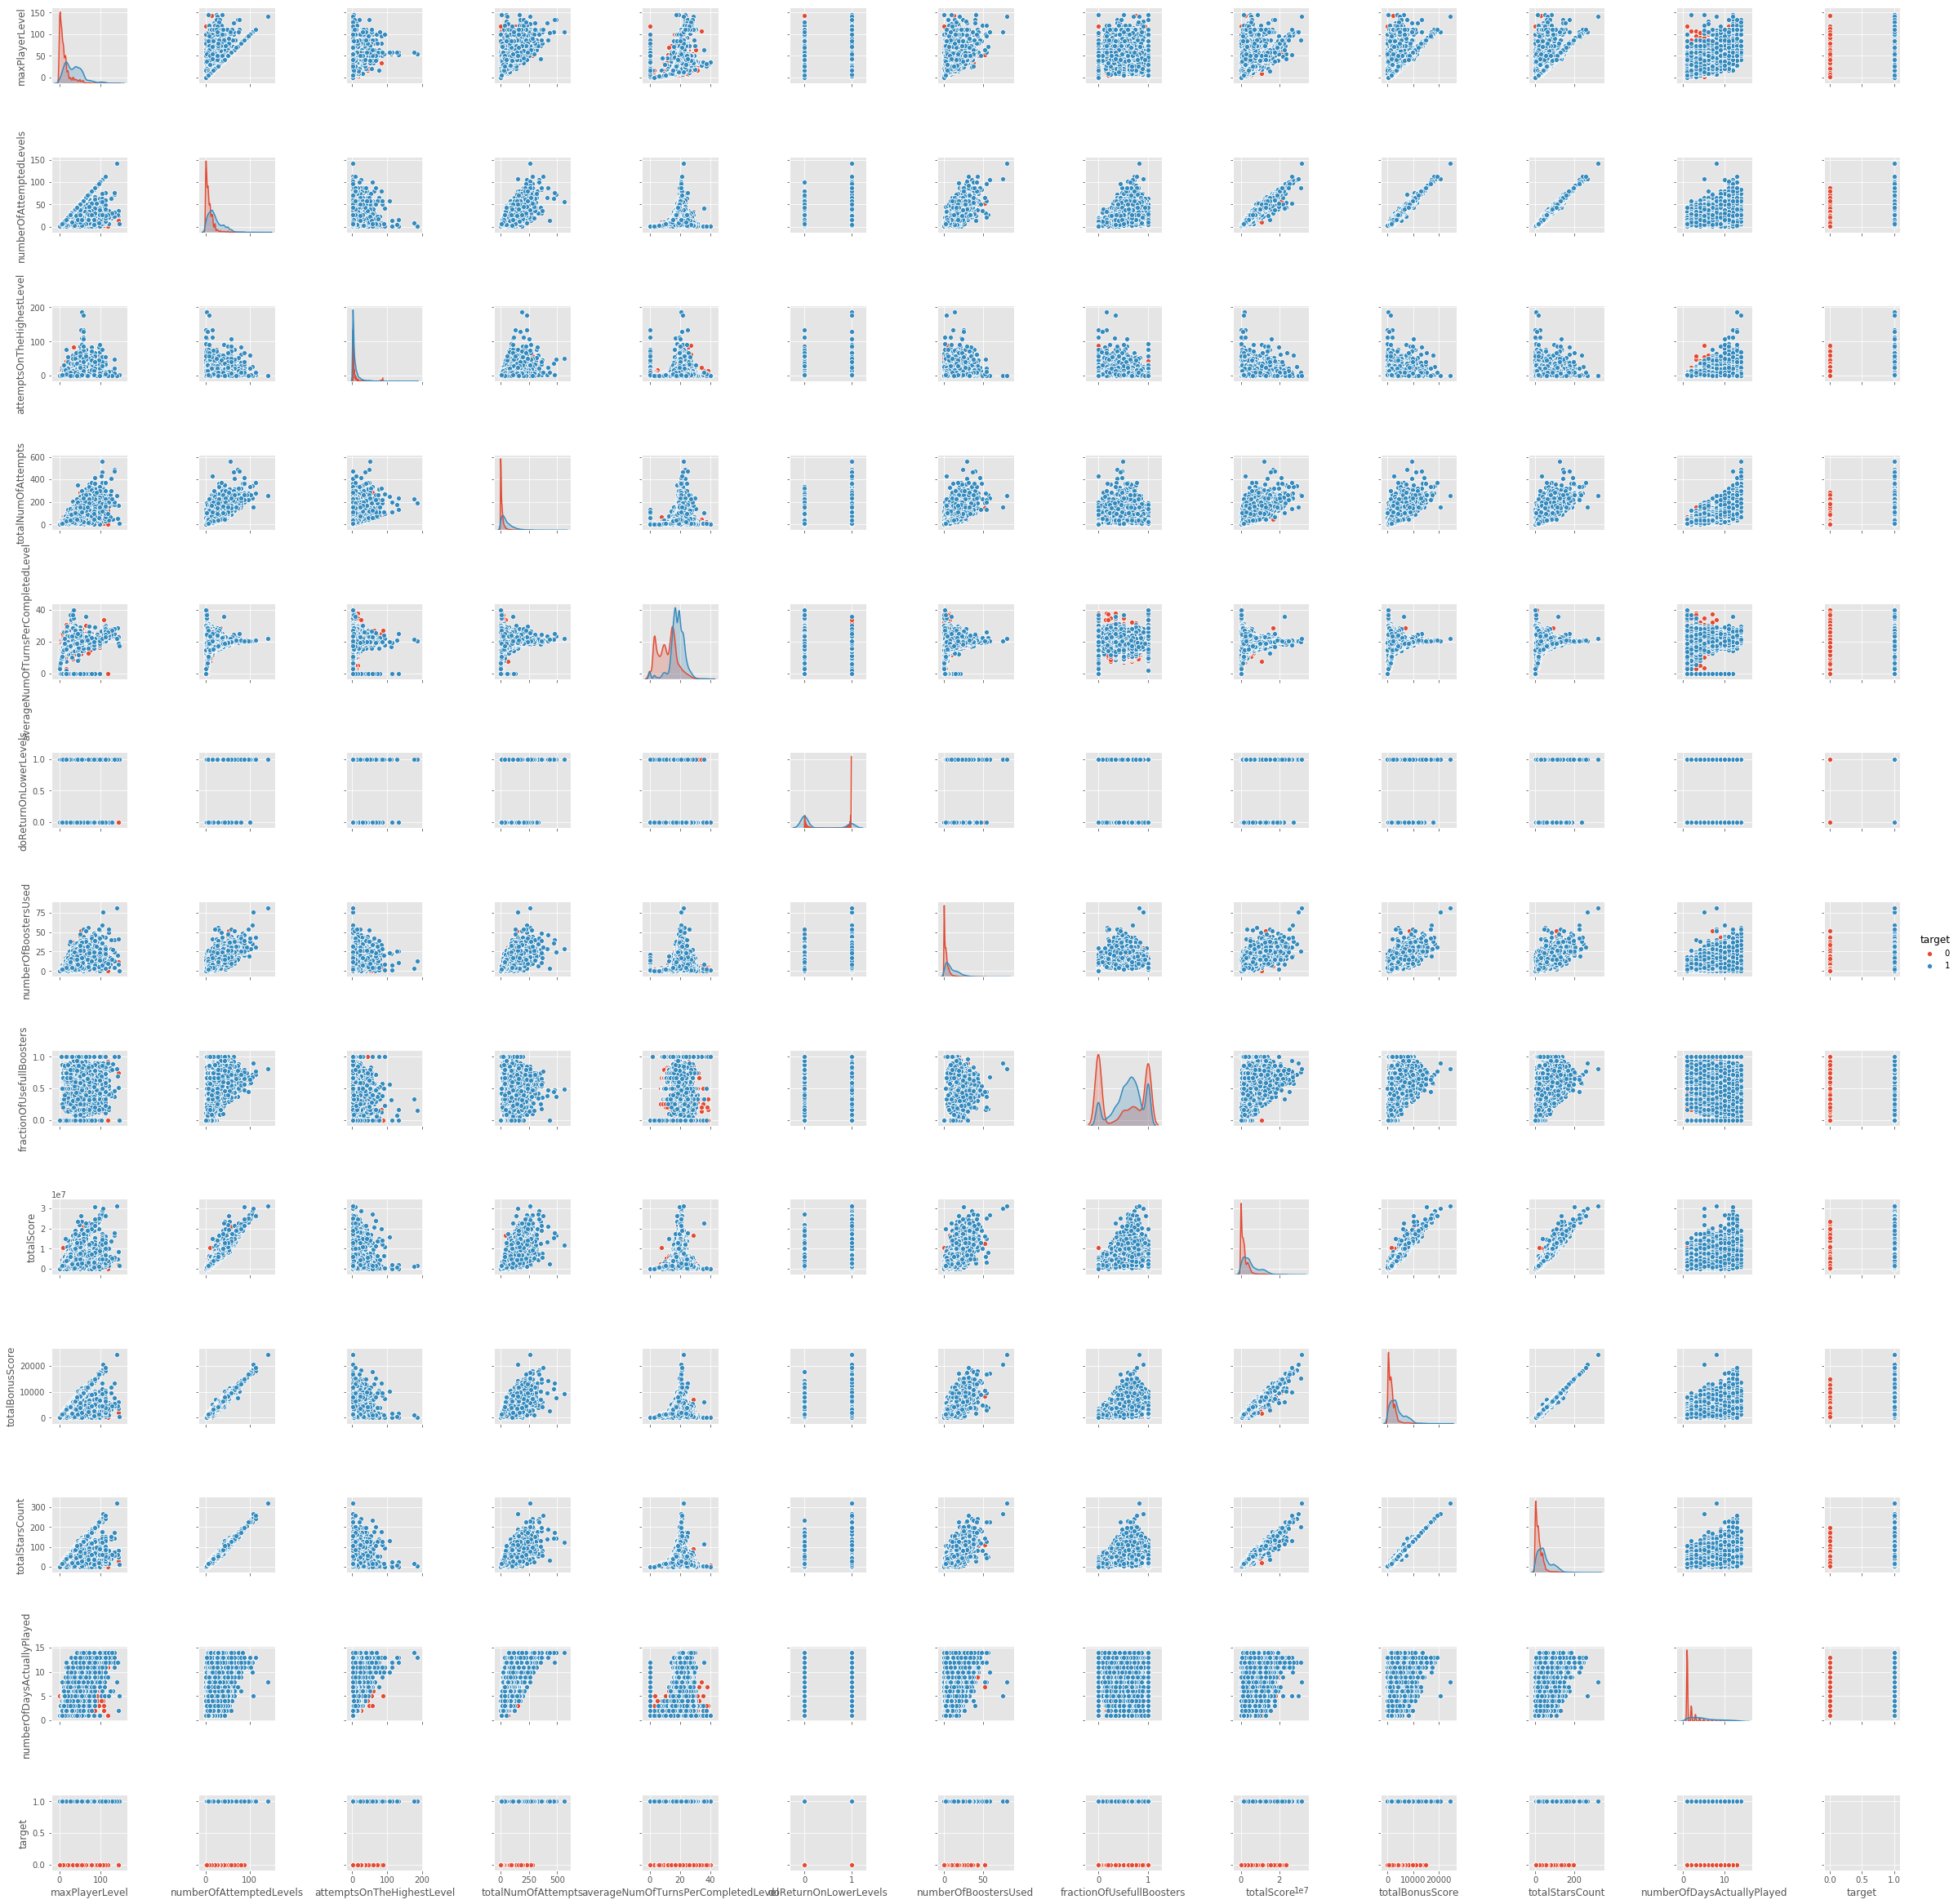

In [45]:
g = sns.pairplot(df, hue="target")

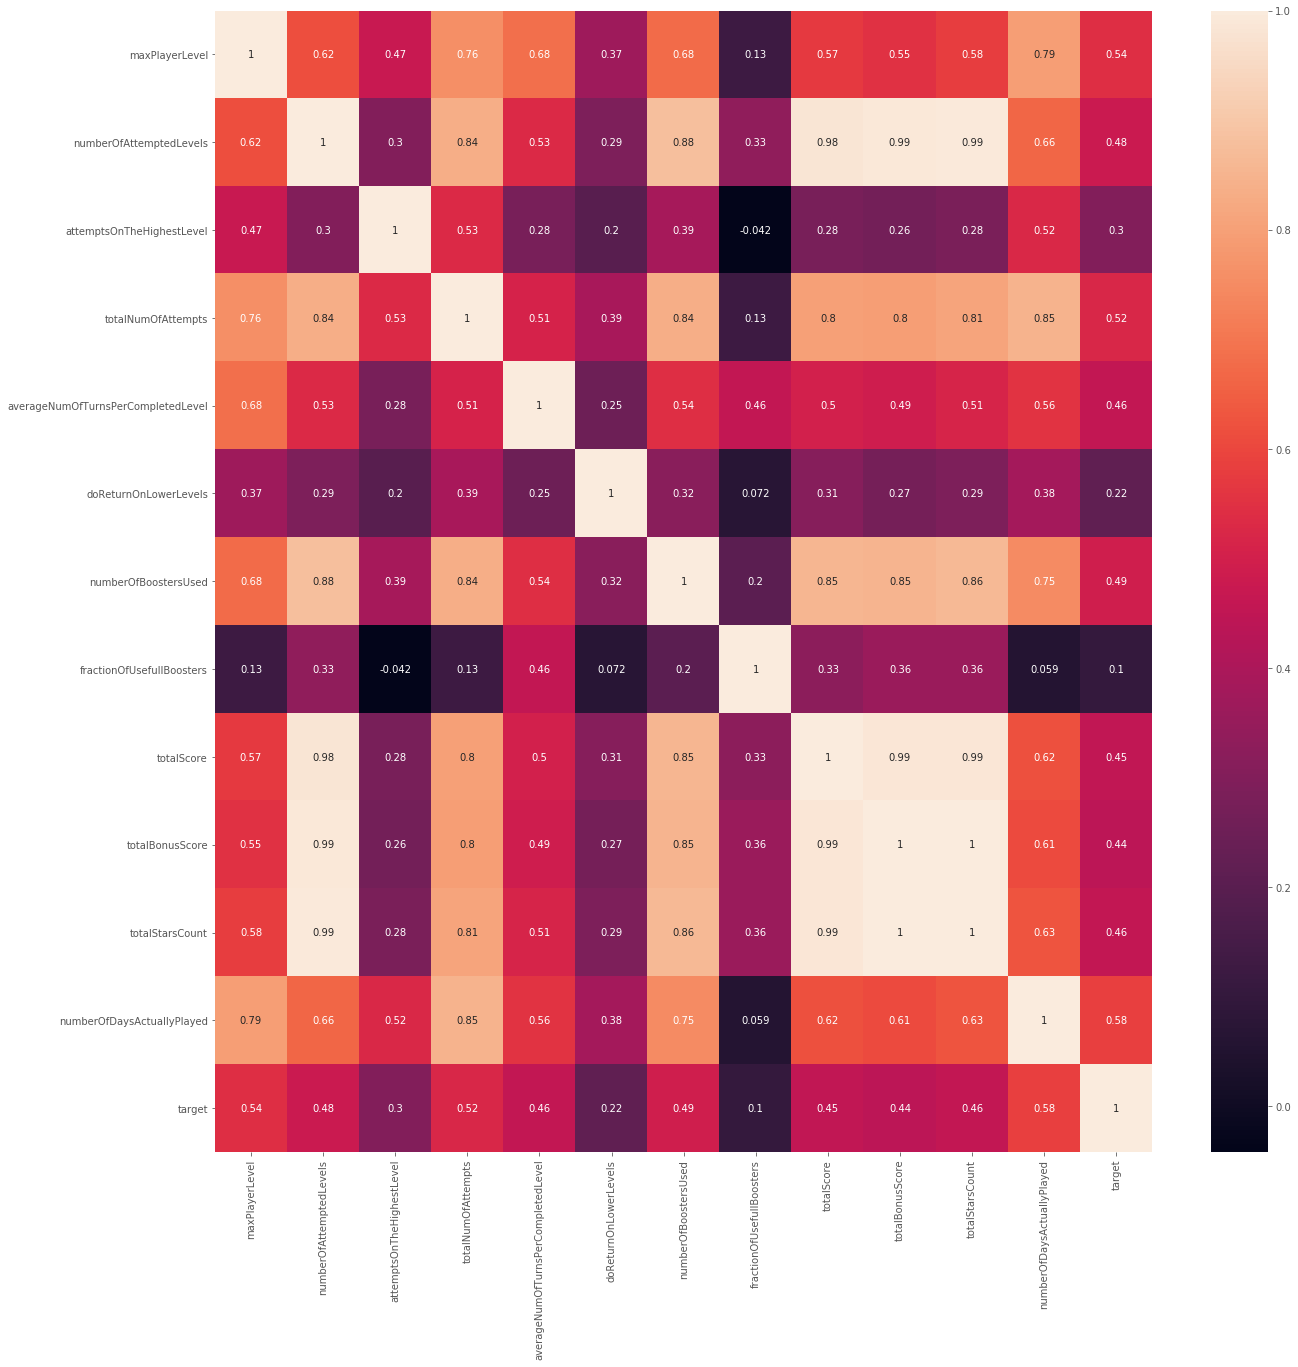

In [46]:
# Посмотрим еще на скоррелированность признаков -  скоррелированных признаков просто дофига
f, ax = plt.subplots(figsize = (21, 21))
sns.heatmap(df.corr(), ax = ax,  annot=True)

### Сжатие признаков для визуализации

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Составьте pipeline, в котором
* Признаки будут нормироваться
* Будет выполняться `PCA` преобразование на 3 компоненты

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
model = Pipeline([
     # краткое описание - тут https://habr.com/post/304214/
    ('scaler', StandardScaler(with_mean=False)),
    ('PCA', PCA(n_components=3))
    
])


Обучите pipeline на данных (без целевой переменной)

In [50]:
proc = model.fit(df)
#y_hat = model.predict(X)

In [51]:
X_norm_piplene = proc.transform(df)

In [52]:
X_norm_piplene.shape

(25289, 3)

Какую **суммарную долю** исходной дисперсии содержат в себе полученные компоненты?

In [53]:
# можно  это сделать через piplene, но я пока сделал так
X = np.array(df)

scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_norm)

pca.explained_variance_ratio_

array([0.59450759, 0.11544548, 0.08101391])

просуммируем значения массива ([0.59450759, 0.11544548, 0.08101391]), получим 0,79 - это и есть суммарная доля исходной дисперсии

Изобразим сжатые данные в пространстве перых двух компонент. Раскрасте точки в цвет "класса".

In [54]:
#show_reduced = model.fit_transform(pca_coord)

In [55]:
df_pca = df.copy()
X_norm_df = pd.DataFrame(X_norm_piplene)

In [56]:
X_norm_df['target'] = df['target']

In [57]:
#X_norm_target = np.array(X_norm_df)

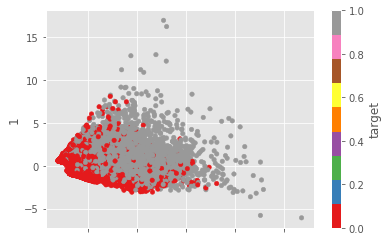

In [58]:
X_norm_df.plot.scatter(x=0, y=1, c='target', cmap=plt.cm.Set1)

### RFE + Decision tree

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve

попробуем пока просто обучить DecisionTree

In [60]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [61]:
##tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)
##tree.fit(X1,y1)


In [62]:
cv = StratifiedKFold(n_splits=5, random_state=123)
scoring = 'roc_auc'

model = DecisionTreeClassifier()

depths = range(1, 10)

train_scores, valid_scores  = validation_curve(model, X, y, param_name='max_depth', param_range=depths, 
                 scoring=scoring, cv=cv, n_jobs=-1)



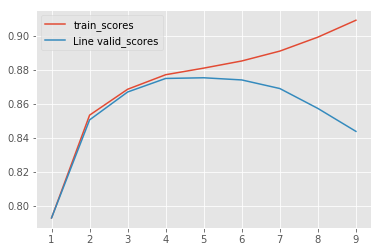

In [63]:
train_scores_line, = plt.plot(depths, train_scores.mean(axis=1))
valid_scores_line, = plt.plot(depths, valid_scores.mean(axis=1))


plt.legend([train_scores_line, valid_scores_line], ['train_scores', 'Line valid_scores'])
plt.show()

In [64]:
train_scores[5] # вернет значение качества для одного из 5-ти обучающих фолдов при глубине 5

array([0.88679308, 0.88426723, 0.88399727, 0.8883434 , 0.88304276])

In [65]:
valid_scores[5]

array([0.87052922, 0.87748238, 0.88108892, 0.86193587, 0.87943158])

In [66]:
from sklearn.model_selection import RandomizedSearchCV

так все же.. составим модель, которая будет состоять из дерева решений, обернутое в RFECVс

Зададим схему кроссвалидации StratifiedKFold с 5 фолдами, перемешиванием и фиксированным random_state
Для RFECV укажим scoring='neg_log_loss' и в параметр cv, передадиме схему из пункта выше

In [67]:
# Разделим датасет на X и y
X1 = df.iloc[:,:-1]
y1 = df.iloc[:,-1]

In [68]:
cv = StratifiedKFold(n_splits=5, random_state=123)
scoring = 'neg_log_loss'

depths = range(3, 9)
scores = []

for i in depths:
    tree = DecisionTreeClassifier(max_depth=i)
    rfecv = RFECV(tree, step = 1, scoring=scoring, cv=cv)
    rfecv.fit(X1,y1)
    scores.append(rfecv.grid_scores_.tolist())
    print('Optimal number of features in depth = {} is {}' .format(i ,rfecv.n_features_) )
    
    columns=[]
    ar = rfecv.support_.tolist()

    for j in range(len(ar)): 
        if ar[j] == True:
            columns.append(j)

    print('and these are {}'.format(columns))
    print('============\n')

Optimal number of features in depth = 3 is 12
and these are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Optimal number of features in depth = 4 is 4
and these are [0, 3, 4, 11]

Optimal number of features in depth = 5 is 3
and these are [0, 3, 11]

Optimal number of features in depth = 6 is 1
and these are [11]

Optimal number of features in depth = 7 is 1
and these are [11]

Optimal number of features in depth = 8 is 1
and these are [11]



* Обучите модель с разной максимальной глубиной дерева (от 3 до 7). 
* Для каждого значения глубины постройте график изменения качества модели в зависимости от количества признаков
* Для наилучшей настройки выведите название отобранных признаков

In [69]:
import matplotlib.patches as mpatches

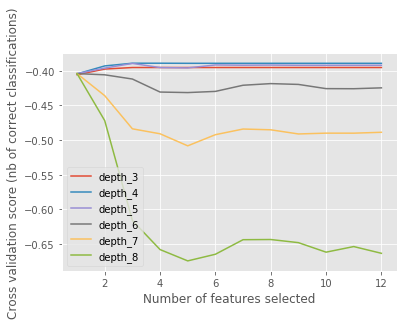

In [70]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

depth_3, = plt.plot(range(1, len(scores[0]) + 1), scores[0], label='depth 3')
depth_4, = plt.plot(range(1, len(scores[1]) + 1), scores[1], label='depth 4')
depth_5, = plt.plot(range(1, len(scores[1]) + 1), scores[2], label='depth 5')
depth_6, = plt.plot(range(1, len(scores[1]) + 1), scores[3], label='depth 6')
depth_7, = plt.plot(range(1, len(scores[1]) + 1), scores[4], label='depth 7')
depth_8, = plt.plot(range(1, len(scores[1]) + 1), scores[5], label='depth 8')
plt.legend([depth_3 , depth_4, depth_5 , depth_6 , depth_7, depth_8  ], ['depth_3', 'depth_4', 'depth_5','depth_6','depth_7', 'depth_8'])


plt.show()

Дальше уже лень автоматизировать: посмотрим глазкам на 4-ю глубину, увидим что там 4 столбца: 0,3,4,11


In [71]:
df.iloc[:,[0,3,4,11]].head()

,maxPlayerLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,numberOfDaysActuallyPlayed
0,39,17,24.444444,2
1,21,55,17.045455,4
2,5,6,8.400000,1
3,21,6,19.000000,1
4,4,5,9.600000,1
